In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sys import path
path.append('../data/')
from data import data
path.append('..')

import properscoring as ps

In [4]:
d_type = "std_anomalies"
loc = "EPO"
file = "../data/" + d_type + "_" + loc + ".nc"
d = data(file)
d_train, d_test, d_val = d.get_data()

The following Variables were used a Lambda layer's call (tf.math.multiply), but
are not present in its tracked objects:
  <tf.Variable 'Weight_matrix_2:0' shape=(40, 60, 3) dtype=float64>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.__operators__.add), but
are not present in its tracked objects:
  <tf.Variable 'bias_matrix_2:0' shape=(40, 60) dtype=float64>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.


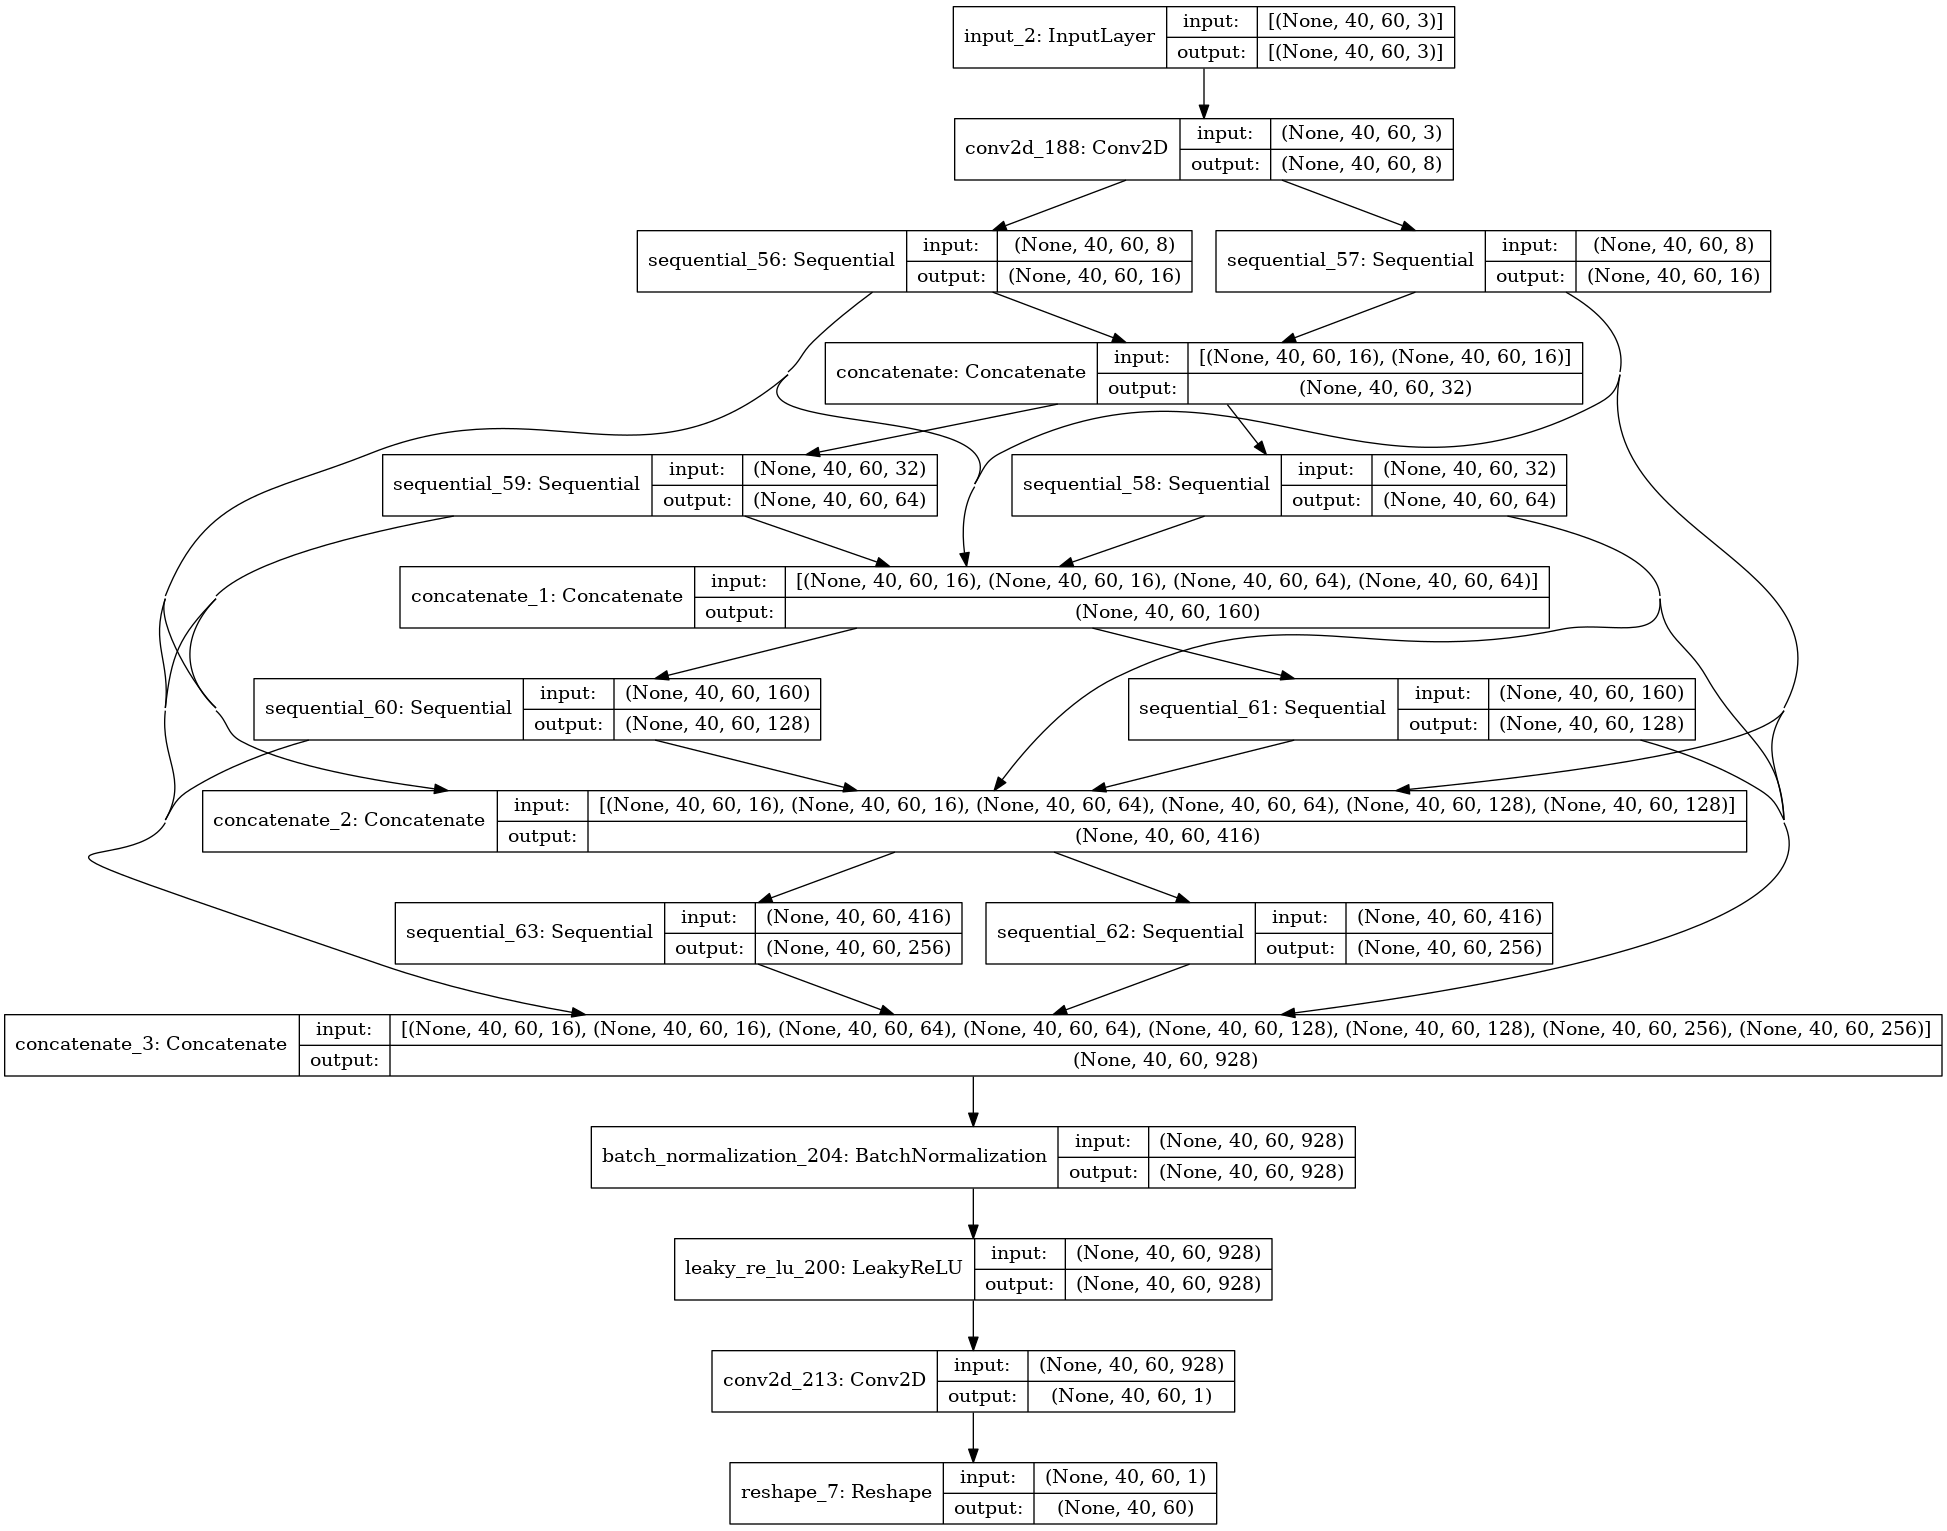

In [9]:
input_dim = (40, 60)
n_features = 3
from models.DEEP_CNN import DEEP_CNN
deep_cnn = DEEP_CNN(input_dim, n_features, variational = True, location = "SIO")
deep_cnn.build((None, 40, 60, 3))
from keras.utils.vis_utils import plot_model
plot_model(deep_cnn.model( (40, 60, 3)), show_shapes=True, show_layer_names=True)
# deep_cnn.train(d_train, d_test, "EPO", "std_anomalies", num_epochs = 40, lr = 1e-4)

In [1]:
import numpy as np
import xarray as xr
import tensorflow as tf

from sys import path
path.append('../data/')
from data import data
path.append('..')

for loc in ["EPO"]:
    print(loc)
    for d_type in ["std_anomalies"]:
        print(d_type)
        file = "../data/" + d_type + "_" + loc + ".nc"
        d = data(file)
        d_train, d_test, d_val = d.get_data()
        if loc == "EPO":
            input_dim = (40,60)
        else:
            input_dim = (20, 120)
        n_features = 3
        
                
        
        from models.CNN import CNN
        l = CNN(input_dim, n_features, batch_norm = True, num_layers = 5, Dropout = 0.1, num_dense_layers = 0, location = loc)
        for (x,y) in d_train:
            y_pred = l(x)
        l.save('../models/saved_models/EPO/std_anomalies/CNN/CNN_MODEL/')

EPO
std_anomalies
INFO:tensorflow:Assets written to: ../models/saved_models/EPO/std_anomalies/CNN/CNN_MODEL/assets
